In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.ndimage import center_of_mass,shift

In [70]:
pth = 'newmethod_hst_aberr_even_200beams_OF1.7_1mm_256pix'
gbd = np.abs(fits.getdata(pth+'_abs.fits')*np.exp(1j*fits.getdata(pth+'_angle.fits')))**2
gbd /= np.sum(gbd)

pth = 'hst_aberrated_huypsf_1um_1mm_512pupil_256img.txt'
zmx = np.genfromtxt(pth,skip_header=21,encoding='UTF-16')

# have to flip
zmx = np.flipud(zmx)
zmx /= np.sum(zmx)
gbd_com = center_of_mass(gbd)
zmx_com = center_of_mass(zmx)
yshift = gbd_com[0]-zmx_com[0]
xshift = gbd_com[1]-zmx_com[1]
zmx = shift(zmx,[yshift,xshift])

gbd_com = center_of_mass(gbd)
zmx_com = center_of_mass(zmx)
yshift = gbd_com[0]-zmx_com[0]
xshift = gbd_com[1]-zmx_com[1]
zmx = shift(zmx,[yshift,xshift])
zmx[zmx==0] = 1e-12
zmx[zmx==np.nan] = 1e-12

gbd_com = center_of_mass(gbd)
zmx_com = center_of_mass(zmx)
yshift = gbd_com[0]-zmx_com[0]
xshift = gbd_com[1]-zmx_com[1]
zmx = shift(zmx,[yshift,xshift])

gbd_com = center_of_mass(gbd)
zmx_com = center_of_mass(zmx)
yshift = gbd_com[0]-zmx_com[0]
xshift = gbd_com[1]-zmx_com[1]
zmx = shift(zmx,[yshift,xshift])
zmx[zmx<=1e-12] = 1e-12
zmx[zmx==np.nan] = 1e-12
print(center_of_mass(gbd))
print(center_of_mass(zmx))

(147.14827125531698, 127.61402287845982)
(147.14833868469205, 127.61401432422848)


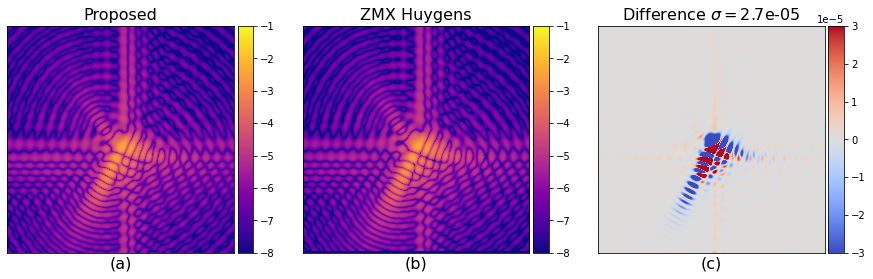

In [77]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(ncols=3,figsize=[15,8])
datasets = [np.log10(gbd),np.log10(zmx),(gbd-zmx)]
cmaps = ['plasma','plasma','coolwarm']
vmins = [-8,-8,-3e-5]
vmaxs = [-1,-1,3e-5]
letters = ['(a)','(b)','(c)',]
titles = ['Proposed','ZMX Huygens','Difference']
for ax,data,cmap,vmin,vmax,title,letter in zip(axs,datasets,cmaps,vmins,vmaxs,titles,letters):
    im = ax.imshow(data,cmap=cmap,vmin=vmin,vmax=vmax)
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size="7%", pad=0.05)
    fig.colorbar(im,cax=cax)
    ax.set_yticks([])
    ax.set_title(title,fontsize=16)
    ax.set_xticks([])
    ax.set_xlabel(letter,fontsize=16)
    # ax.set_title(title,fontsize=16)
axs[2].set_title(title+r' $\sigma = $'+f'{np.std(data):.2}',fontsize=16)
fig.savefig('aberrated_psf_compare.png')

In [26]:
import numpy as np
import matplotlib.pyplot as plt
refract = lambda efl: np.array([[1,0],[-1/efl,1]])
distance = lambda dis: np.array([[1,dis],[0,1]])

yout = []
dis = np.linspace(-10,10,100)
for i in dis:
    rayvec = distance(i) @ refract(20) @ distance(5) @ np.array([0,0.1]).T
    yout.append(rayvec[0])

(-7.0, 5.0)

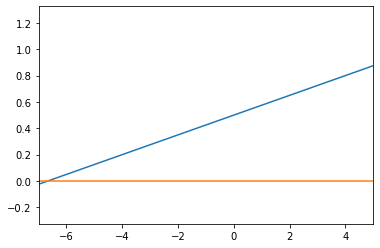

In [27]:
plt.plot(dis,yout)
plt.plot(dis,0*dis)
plt.xlim([-7,5])

array([], dtype=float64)